# Handwritten digit recognition

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Data import

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
X, y = mnist.data, mnist.target

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

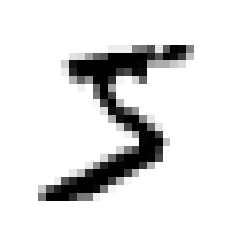

In [9]:
some_digit = X[0]
plot_digit(some_digit)

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
X_train, X_val, y_train, y_val = X_train[:50000], X_train[50000:], y_train[:50000], y_train[50000:]

In [12]:
X_train.shape

(50000, 784)

In [13]:
X_val.shape

(10000, 784)

In [14]:
X_test.shape

(10000, 784)

Model 1: Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.pipeline import Pipeline, make_pipeline

In [32]:
from sklearn.preprocessing import StandardScaler

In [48]:
log_clf = make_pipeline(StandardScaler(), LogisticRegression(solver = 'newton-cg'))

In [49]:
#log_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='newton-cg'))])

In [17]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(log_clf.predict(X_val), y_val)

0.9224

In [19]:
from joblib import dump, load

In [80]:
#dump(log_clf, './models/mnist_log.joblib')

['./models/mnist_log.joblib']

In [20]:
log_clf = load('./models/mnist_log.joblib')

Model 2: Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
naive_clf = MultinomialNB()

In [36]:
naive_clf.fit(X_train,y_train)

MultinomialNB()

In [37]:
naive_clf.predict(some_digit.reshape(1,-1))

array(['5'], dtype='<U1')

In [38]:
accuracy_score(naive_clf.predict(X_val), y_val)

0.8435

In [29]:
naive_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

Model 3: SVM